# Cherry Leaves - Mildew Detection

## Objectives

* Business requirement 2

## Inputs

* Train dataset
* Test dataset
* Validation dataset
* Image shapes

## Outputs

* Augmentation
* Distibution
* Prediction



---

# Setting up the Working directory

## Import Libraries needed

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

In [8]:
current_dir = os.getcwd()
current_dir

'/workspaces/cherry-leaves/jupyter_notebooks'

In [9]:
os.chdir('/workspaces/cherry-leaves')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [10]:
current_dir = os.getcwd()
current_dir

'/workspaces/cherry-leaves'

## Input directories

In [11]:
data_dir = 'input/full_dataset/cherry-leaves'
train_data_path = data_dir + '/train'
valid_data_path = data_dir + '/validation'
test_data_path = data_dir + '/test'

## Output directories


In [12]:
version = 'v1'
file_path = f'output/{version}'

if 'output' in os.listdir(current_dir) and version in os.listdir(current_dir + '/output'):
    print('Create a new version')
    pass
else:
    os.makedirs(name=file_path)

Create a new version


### Labels

In [13]:
label = os.listdir(train_data_path)
print('These are the labels',label)

These are the labels ['healthy', 'powdery_mildew']


In [14]:
version =  'v1'
img_shape = joblib.load(filename=f"output/{version}/shape.pk1")
img_shape

(256, 256, 3)

---

# Images in each set

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




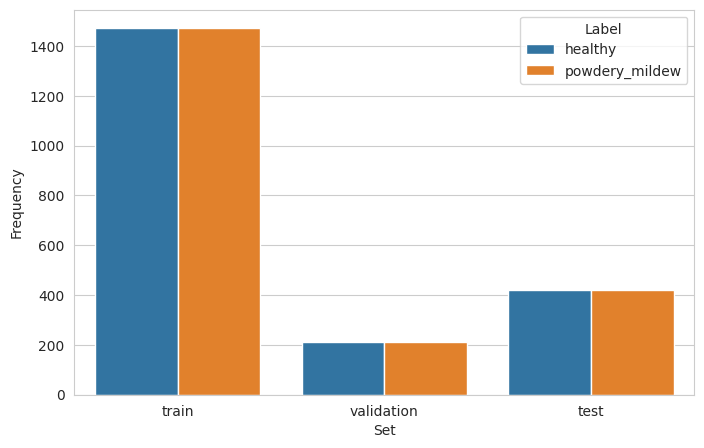

In [20]:
freq = pd.DataFrame([]) 
for dataset in ['train', 'validation', 'test']:
  for title in label:
    freq = freq.append(
        pd.Series(data={'Set': dataset,
                        'Label': title,
                        'Frequency':int(len(os.listdir(data_dir+'/'+ dataset + '/' + title)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {dataset} - {title}: {len(os.listdir(data_dir+'/'+ dataset + '/' + title))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()

## Augmentation


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#### Ways in which the data will be augmented

In [17]:
# augmented_data = ImageDataGenerator(horizontal_flip=True,
#                                     vertical_flip=True,
#                                     zoom_range=0.2,
#                                     shear_range=0.2
#                                     rescale=1./255)
augmented_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.30, 
                                   height_shift_range=0.30,
                                   shear_range=0.6,
                                   zoom_range=0.5,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

#### Augment the train dataset

In [22]:
size = 20 
train_data_set = augmented_data.flow_from_directory(train_data_path,
                                              target_size=img_shape[:2],
                                              color_mode='rgb',
                                              batch_size=batch_size,
                                              class_mode='binary',
                                              shuffle=True
                                              )



Found 2944 images belonging to 2 classes.


#### Augment the validation dataset

In [23]:
valid_data_set = ImageDataGenerator(rescale=1./255).flow_from_directory(valid_data_path,
                                                          target_size=img_shape[:2],
                                                          color_mode='rgb',
                                                          batch_size=size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )



Found 420 images belonging to 2 classes.


#### Augment the test dataset

In [24]:
test_data_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_data_path,
                                                          target_size=img_shape[:2],
                                                          batch_size=size,
                                                          class_mode='binary',
                                                          shuffle=False
                                                          )

Found 844 images belonging to 2 classes.


## Plot the images

### Plot for the augmented train, test and validation data set

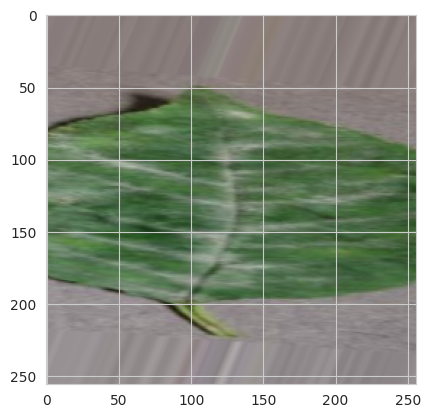

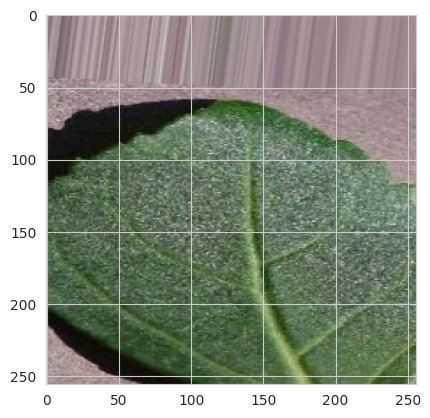

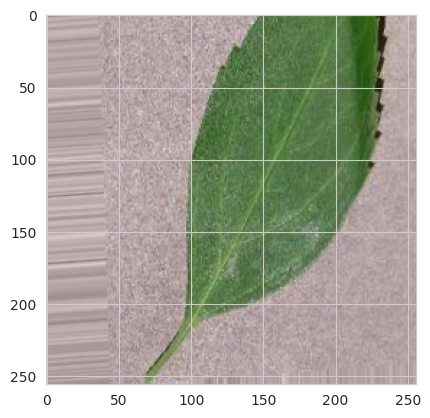

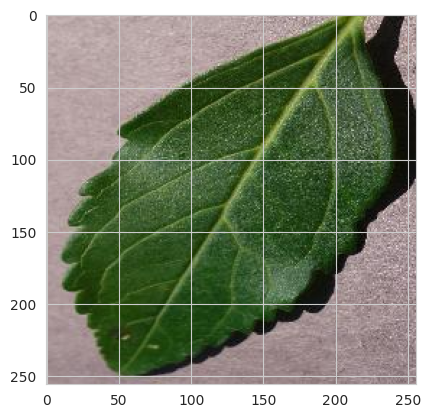

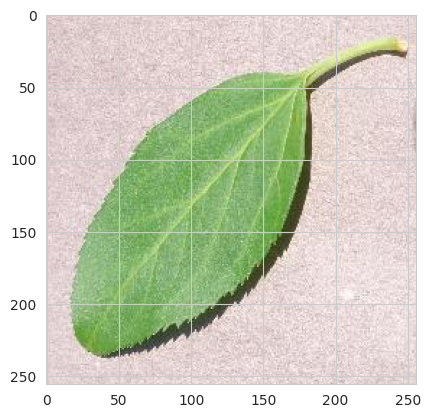

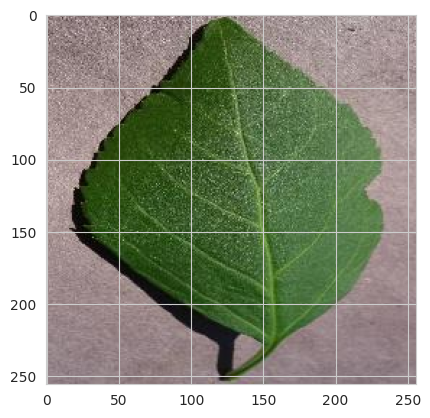

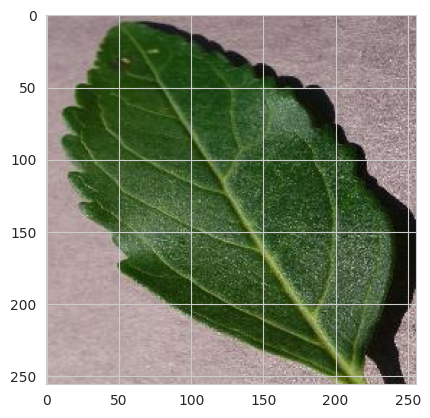

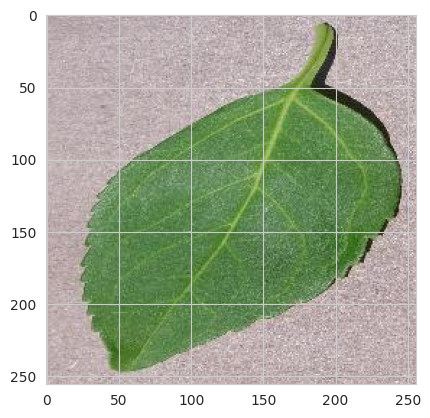

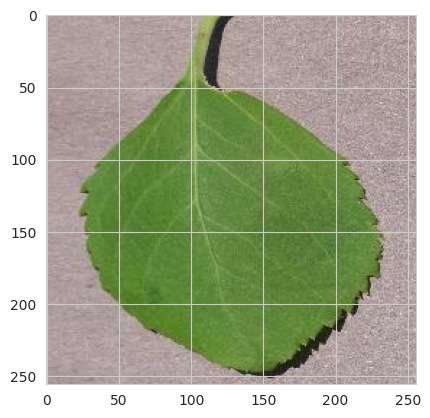

In [25]:
for _ in range(3):
    img, label = train_data_set.next() #training data set
    plt.imshow(img[0])
    plt.show()

for _ in range(3):
    img, label = test_data_set.next() #test data set
    plt.imshow(img[0])
    plt.show()

for _ in range(3):
    img, label = valid_data_set.next() #validation data set
    plt.imshow(img[0])
    plt.show()

In [ ]:
joblib.dump(value=train_data_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

## ML Model

### Model packages